# Plot a spike raster with matplotlib
- [eventplot ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.eventplot.html)

Relevent snip from the [brainhack code](https://github.com/SpikeAI/2022-11_brainhack_DetecSpikMotifs/blob/main/brainhack.py) on how they plot the spike raster with mpl:
```python
for i in range(0, N_neurons):
    ax.eventplot(np.where(raster[i_trial, i, :] == 1.)[0], 
        colors=colors[i], lineoffsets=1.*i+spikelength/2, 
        linelengths=spikelength, linewidths=linewidths)

```

This is the example in the matplotlib ref:

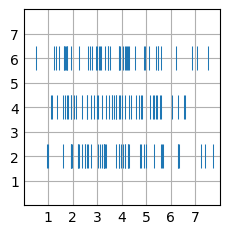

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# make data:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))

# plot:
fig, ax = plt.subplots()

ax.eventplot(D, lineoffsets=x, linewidth=0.75)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

... but of course neurons will have different spike counts.. so instead we can pass a list of array-like instead of havning to overlay each individual spike train

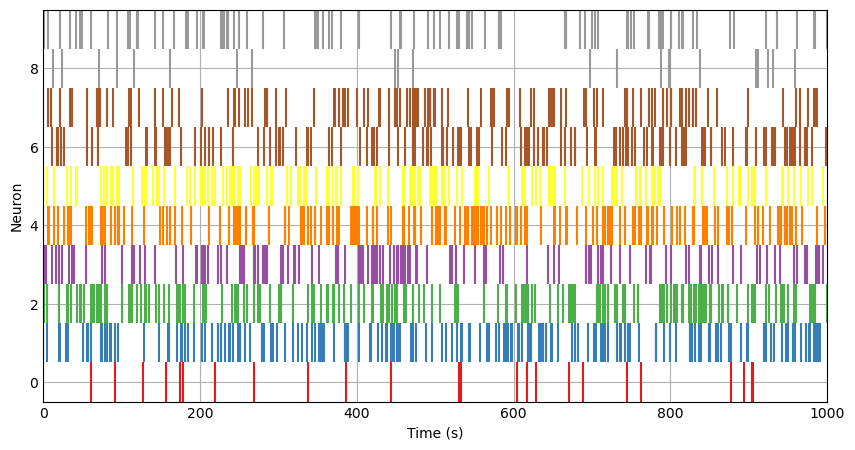

In [39]:

n_neurons = 10
duration = 1000
spike_times = [np.sort(np.random.uniform(low=0, high=duration, size=np.random.randint(0, 200))) for _ in range(n_neurons)]

colors = plt.cm.Set1(np.linspace(0, 1, n_neurons))

# Plot the spike raster
fig, ax = plt.subplots(figsize=(8, 4))
ax.eventplot(spike_times, colors=colors)
ax.set_xlim(-.01, duration+.01)
ax.set_ylim(-.5, len(spike_times)-.5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neuron')
plt.show()


This isn't bad.. I will adopt the input data format of a list of array-like